# **IMAGE ANALYSIS**
## **Practice 8.** Convolutional Neural Network.
#### Created by: Bryan Israel Blancas Pérez.
##### ID: 201663003
##### Group: 3CV7

## Convolutional Neural Network

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, and natural language processing.

A convolutional neural network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product. The activation function is commonly a RELU layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers, referred to as hidden layers because their inputs and outputs are masked by the activation function and final convolution. The final convolution, in turn, often involves backpropagation in order to more accurately weight the end product.

![Convolución](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)


## Code

#### 1. Import tensorflow, keras and numpy

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version: "+tf.__version__)

TensorFlow 2.x selected.
TensorFlow version: 2.0.0


#### 2. Load dataset

In [0]:
hoh_builder = tfds.builder("horses_or_humans")
hoh_builder.download_and_prepare()
hoh_dataset = hoh_builder.as_dataset()
hoh_train, hoh_test = hoh_dataset["train"], hoh_dataset["test"]

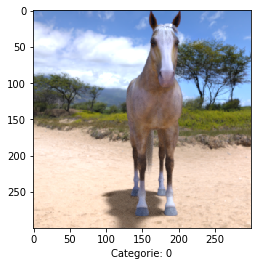

In [0]:
for hoh_example in hoh_train.take(1): 
  image, label = hoh_example["image"], hoh_example["label"]
plt.imshow(image.numpy())
plt.xlabel("Categorie: "+str(label.numpy()))
plt.show()

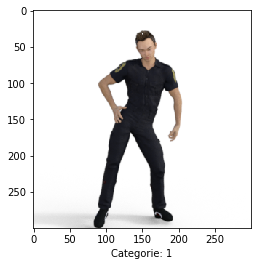

In [0]:
for hoh_example in hoh_test.take(3): 
  image_test, label_test = hoh_example["image"], hoh_example["label"]
plt.imshow(image_test.numpy())
plt.xlabel("Categorie: "+str(label_test.numpy()))
plt.show()

#### 3. Pre-processing dataset

In [0]:
image = np.empty((1027,300,300,3))
i = 0
for thing in hoh_train.take(1027):
  image_dic = thing["image"]
  image_np = image_dic.numpy()
  image[i,:,:,:] = image_np.astype(np.float32)/255
  i += 1

In [0]:
label = np.empty((1027), dtype=np.uint8)
i = 0
for thing in hoh_train.take(1027):
  label_dic = thing["label"]
  label_np = label_dic.numpy()
  label[i] = int(label_np)
  i += 1
  
label = to_categorical(label)

In [0]:
image_test = np.empty((256,300,300,3))
i = 0
for thing in hoh_test.take(256):
  image_dic = thing["image"]
  image_np = image_dic.numpy()
  image_test[i,:,:,:] = image_np.astype(np.float32)/255
  i += 1

In [0]:
label_test = np.empty((256), dtype=np.uint8)
i = 0
for thing in hoh_test.take(256):
  label_dic = thing["label"]
  label_np = label_dic.numpy()
  label_test[i] = int(label_np)
  i += 1
  
label_test = to_categorical(label_test)

#### 4. Create and train neural network


In [0]:
num_filters = 8
filter_size = 3
pool_size = 2

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_filters, filter_size, input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=pool_size),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
]) 
model.compile('adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(image, label, epochs=5)

Train on 1027 samples
Epoch 1/5
1027/1027 [==============================] - 75s 73ms/sample - loss: 0.6655 - accuracy: 0.7741
Epoch 2/5
1027/1027 [==============================] - 76s 74ms/sample - loss: 0.1064 - accuracy: 0.9649
Epoch 3/5
1027/1027 [==============================] - 72s 70ms/sample - loss: 0.0414 - accuracy: 0.9834
Epoch 4/5
1027/1027 [==============================] - 73s 71ms/sample - loss: 0.0130 - accuracy: 0.9971
Epoch 5/5
1027/1027 [==============================] - 73s 71ms/sample - loss: 0.0047 - accuracy: 0.9990


#### 5. Test Neural Network

In [0]:
test_loss, test_acc = model.evaluate(image_test, label_test)
print(test_loss)
print(test_acc)

256/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Conclusions

In this practice I have learnt something new, I mean Convolutional Neural Networks is a completely new concept for me.

This practice was about to train a neural neuwork with a public image dataset. I chose horses_or_human which is a dataset with 1027 300x300 color training images, labeled over 2 categories, and 256 test images. The aim was categorized each one of them correctly, human or horse, by a trained neural network.

I chose a model with 3 convolutional layers that became the image so much smaller than the original one. Doing 5 epochs, I was able to reach up to 99% of accuracy meanwhile with the test images the percentage of accuracy was 82%.

I have already realized that desing and train a neural network is not a trivial work, it is so difficult but, at the same time, kind of exciting work.